## About Dataset

## Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).



The following acoustic properties of each voice are measured and included within the CSV:



|Feature|Description|
|-----|-----|
|meanfreq| mean frequency (in kHz)|
|sd| standard deviation of frequency|
|median| median frequency (in kHz)|
|Q25| first quantile (in kHz)|
|Q75| third quantile (in kHz)|
|IQR| interquantile range (in kHz)|
|skew| skewness (see note in specprop description)|
|kurt| kurtosis (see note in specprop description)|
|sp.ent| spectral entropy|
|sfm| spectral flatness|
|mode| mode frequency|
|centroid| frequency centroid (see specprop)|
|peakf| peak frequency (frequency with highest energy)|
|meanfun| average of fundamental frequency measured across acoustic signal|
|minfun| minimum fundamental frequency measured across acoustic signal|
|maxfun| maximum fundamental frequency measured across acoustic signal|
|meandom| average of dominant frequency measured across acoustic signal|
|mindom| minimum of dominant frequency measured across acoustic signal|
|maxdom| maximum of dominant frequency measured across acoustic signal|
|dfrange| range of dominant frequency measured across acoustic signal|
|modindx| modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental               frequencies divided by the frequency range|
|label| male or female|

## Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Loading the dataset

In [3]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Task 1: Check the correlation between each feature and also check whether there is any null values.

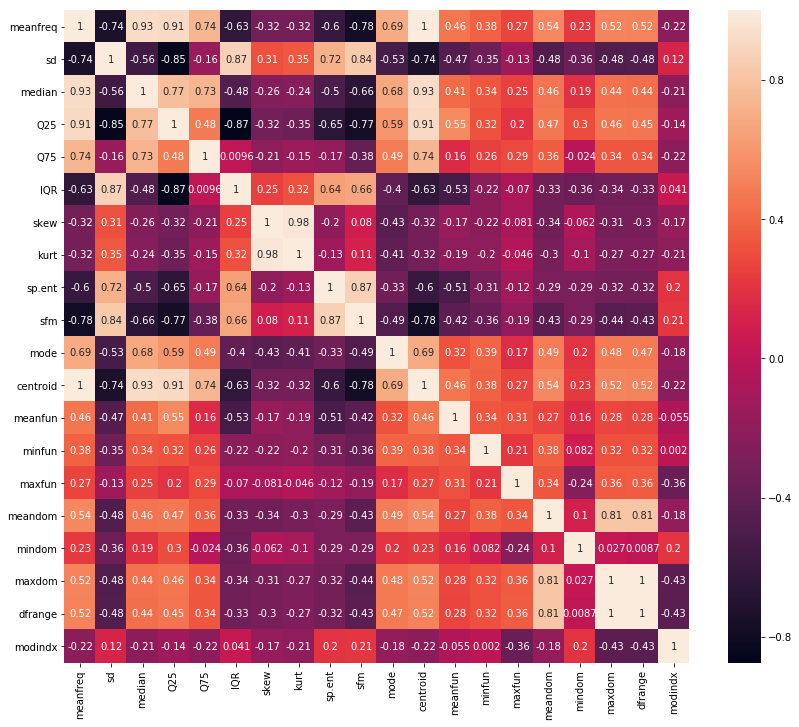

In [6]:
ax = plt.subplots(figsize =(14, 12))
sns.heatmap(df.corr(),annot=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


## Task 2 :  Print total number of labels. Also print the number of Male and Female labels respectively.

In [8]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [10]:
df.label.count()

3168

## Task 3: Label encode the target variable (i.e. male as 1 and female as 0).

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['label'])

## Task 4: Scale all the independent features and also split the dataset into training and testing set.

In [14]:
X = df.drop(['label'], 1).copy()
y = df['label'].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Task 5: Build model with SVC classifier keeping default Linear kernel and calculate accuracy score.

In [19]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
classifier = SVC(random_state = 0) 
  
# fitting x samples and y classes 
classifier.fit(X_train, y_train) 

# predicting x_test samples
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("confusion_matrix", confusion)
print('accuracy', accuracy)

confusion_matrix [[368   5]
 [  8 411]]
accuracy 0.9835858585858586


## Task 6: Build SVC classifier model with polynomial kernel and calculate accuracy score

In [20]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
classifier = SVC(kernel='poly', random_state = 0) 
  
# fitting x samples and y classes 
classifier.fit(X_train, y_train) 

# predicting x_test samples
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("confusion_matrix", confusion)
print('accuracy', accuracy)

confusion_matrix [[350  23]
 [  8 411]]
accuracy 0.9608585858585859


## Task 7: Build SVM model with rbf kernel.

In [21]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
classifier = SVC(kernel='rbf', random_state = 0) 
  
# fitting x samples and y classes 
classifier.fit(X_train, y_train) 

# predicting x_test samples
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("confusion_matrix", confusion)
print('accuracy', accuracy)

confusion_matrix [[368   5]
 [  8 411]]
accuracy 0.9835858585858586


## Task 8: Remove Correlated Features.

As we have learned earlier one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity).We will find the features that have a correlation higher that 0.95 and remove the same so that the assumption for logistic regression model is satisfied..

In [28]:
df1 =df.corr()

In [34]:
df1

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [37]:
# Remove Correlated features above 0.95 and then apply logistic model
corr_matrix= df.drop('label',1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [39]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [40]:
print("Columns to drop", to_drop)

Columns to drop ['kurt', 'centroid', 'dfrange']


In [41]:
df.drop(to_drop,1, inplace=True)

## Task 9: Split the newly created data frame into train and test set, scale the features and apply SVM model with rbf kernel to newly created dataframe.

In [43]:
X = df.copy()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
# import support vector classifier 
classifier = SVC(kernel='rbf', random_state = 0) 
  
# fitting x samples and y classes 
classifier.fit(X_train, y_train) 

# predicting x_test samples
y_pred = classifier.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("confusion_matrix", confusion)
print('accuracy', accuracy)

confusion_matrix [[373   0]
 [  1 418]]
accuracy 0.9987373737373737


## Task 10: Do Hyperparameter Tuning using GridSearchCV and evaluate the model on test data.

In [64]:
#Best Model selected for higher precision and better recall is:
#Gradient Boosting with LE+Transformation & Scaling with SMOTE
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_dict = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(estimator = SVC(kernel='rbf'), param_grid= param_dict, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search

In [67]:
grid_search= svc_param_selection(X_train, y_train)

In [66]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
y_pred = grid_search.predict(X_test)

In [69]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("confusion_matrix", confusion)
print('accuracy', accuracy)

confusion_matrix [[373   0]
 [  0 419]]
accuracy 1.0
